## Let's load the necessary libraries and data and start coding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset using pandas

In [2]:
#importing train dataset
df=pd.read_csv('data_2_var.csv', names= ['x','y']) #Reading csv file

In [3]:
print('Number of Rows :' , df.shape[0])
print('Number of columns :' , df.shape[1])
df.head()

Number of Rows : 1111
Number of columns : 2


x           y
0 -122.740667 -130.572085
1 -121.531419 -129.938929
2 -134.917019 -130.141832
3 -120.605951 -125.760932
4 -129.894781 -112.785214

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['x', 'y']}

### Observation :
- **Dataset contains 1111 rows and 2 columns.**
- **Both of features are with float datatype.**
- **In this dataset Y is our target feature.**

# Stastical Matrix

In [4]:
df.describe().T

count       mean        std         min        25%        50%        75%  \
x  1111.0   6.783026  79.383668 -134.962839 -53.521987  15.737782  76.134647   
y  1111.0 -26.187358  69.794973 -132.422167 -77.000000 -46.072638   7.435231   

          max  
x  134.605775  
y  134.425495

### Observation:
- **The value of median is greater than mean for feature X. Which suggest feature X is skewed in nature.**
- **Comparing 75% and max columns , clearly indicate that outliers exist in both dataset.**
- **Target feature Y is also skewed in nature.**

### Data Integrity Check

- **Checking for missing values in data**

In [5]:
df.isnull().sum().any()

False

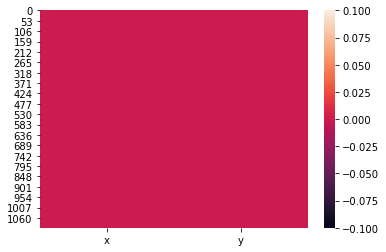

In [9]:
sns.heatmap(df.isnull())
plt.show()

**Data do not contain any missing values.**

- **Checking for duplicate data**

In [10]:
df.duplicated().sum()

21

**Data contain duplicates values , we will drop duplicate value.**

In [11]:
# Droping duplicate entries
df.drop_duplicates(keep='last', inplace =True)

## EDA

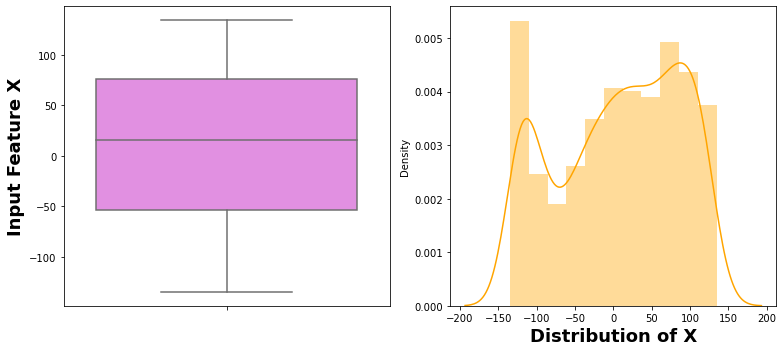

In [5]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
sns.boxplot(y='x', data= df, color = 'violet')
plt.ylabel('Input Feature X',fontweight = 'bold',fontsize= 18)
plt.subplot(1,2,2)
sns.distplot(df['x'], color ='Orange')
plt.xlabel('Distribution of X',fontweight = 'bold',fontsize= 18)
plt.tight_layout()
plt.show()

### Observation:
- **Boxplot doesnot show outliers.**
- **Distribution plot of feature x shows presense of abnormal values at left end.**

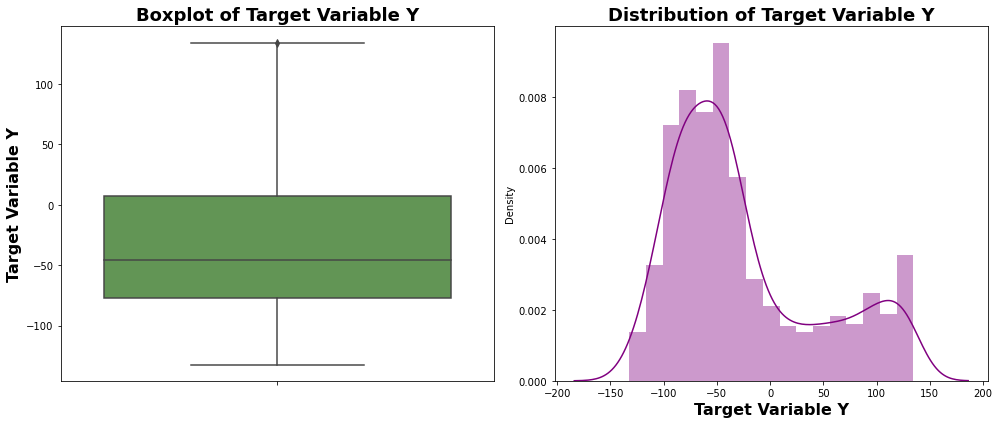

In [6]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['y'], palette='gist_earth_r')
plt.title('Boxplot of Target Variable Y',fontweight ='bold', fontsize = 18)
plt.ylabel('Target Variable Y', fontweight ='bold', fontsize = 16 )
plt.subplot(1,2,2)
sns.distplot( x = df['y'],color ='Purple' )
plt.title('Distribution of Target Variable Y',fontweight ='bold', fontsize = 18)
plt.xlabel('Target Variable Y',fontweight ='bold', fontsize = 16)
plt.tight_layout()
plt.show()

### Observation:
- **Boxplot doesnot show outliers.**
- **Distribution plot of feature y shows presense of abnormal values at right end.**

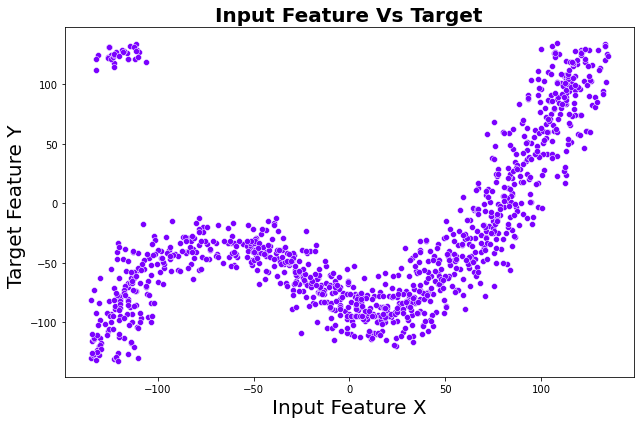

In [7]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['y'],x=df['x'])
plt.title("Input Feature Vs Target",fontsize=20,fontweight ='bold')
plt.xlabel('Input Feature X',fontsize = 20)
plt.ylabel('Target Feature Y ',fontsize = 20)
plt.tight_layout()
plt.show()

### Observation:
- **Data is curvilinear as observed in scatterplot.**
- **We can see outliers in scatterplot.**

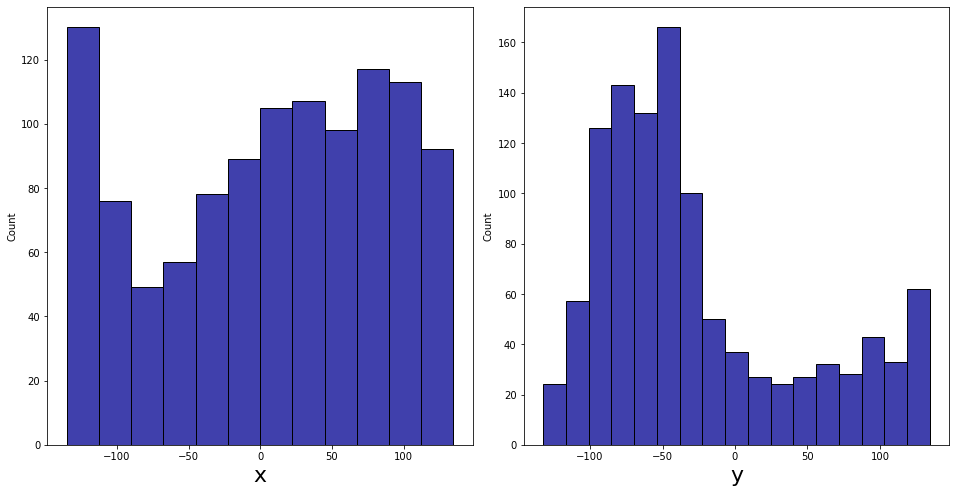

In [12]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=3:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.tight_layout()
plt.show()

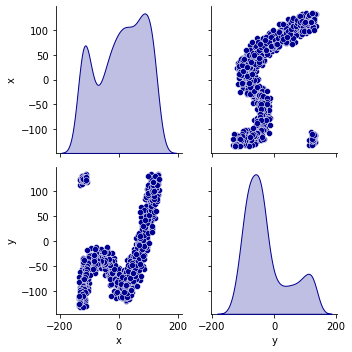

In [11]:
sns.set_palette('gnuplot2')
sns.pairplot(df,diag_kind='kde')
plt.show()

># Feature Enginnering

### 1. Outliers Detection and Removal

**Outliers can exist in continous numerical features which can severely affect accuracy of prediction. In this dataset *outliers are not visible in boxplot but visible in scatterplot* . In this section we will remove outliers in data.**

In [13]:
df1=df.copy()

In [21]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1111, 2)
Shape of the dataframe after removing outliers:  (1111, 2)
Percentage of data loss post outlier removal:  0.0


**As expectecd Z-score not able to removed outliers as they are bivariate outliers.**

### Comment :
- **There are outliers exist in data.**

- **So we will use Quantile-based Flooring and Capping technique.**


**We will Employ Quantile-based Flooring and Capping technique for outliers removal. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 10th percentile) for the higher values.**

In [60]:
df1=df.copy()
Q1 = df1.quantile(0.05)
Q3= df1.quantile(0.65)
IQR = Q3 - Q1
print(IQR)

x    174.769708
y     80.412995
dtype: float64


In [61]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(987, 2)


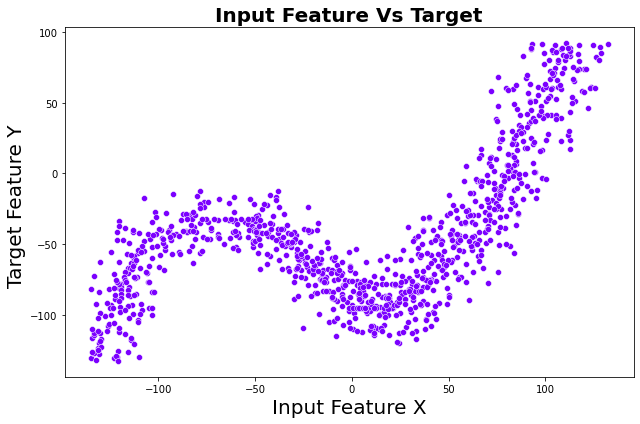

In [62]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize =(9,6))
sns.scatterplot(y=data['y'],x=data['x'])
plt.title("Input Feature Vs Target",fontsize=20,fontweight ='bold')
plt.xlabel('Input Feature X',fontsize = 20)
plt.ylabel('Target Feature Y ',fontsize = 20)
plt.tight_layout()
plt.show()

##### Data Loss

In [47]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1111-987)/1111)*100,'%')

Percentage Data Loss : 11.161116111611161 %


### 2. Skewness of features

In [63]:
data.skew()

x   -0.283924
y    0.921398
dtype: float64

**Skewness is within limit for feature x.**

### 3. Corrleation

In [65]:
data.corr()

x         y
x  1.000000  0.595241
y  0.595241  1.000000

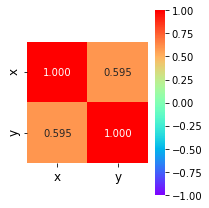

In [68]:
plt.figure(figsize=(3,3))
sns.heatmap(data.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 5. Standard Scaling

In [69]:
# Splitting data in target and dependent feature
X = data.drop(['x'], axis =1)
Y = data['y']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

>## Machine Learning Model Building

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (690, 1)
Training Target Vector Size : (690,)
Test Feature Matrix Size: (297, 1)
Test Target Vector Size: (297,)


### Model Evalution:
- **We will use R2 score and RSME values as model evaluation criteria**
- **Cross valiation for all models**
- **Hyperparameter tuning on best model to regularize and optimize model.**

### **1. Random Forest Regressor**

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 99, test_size=0.25)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 0.11697098904060482
Mean squared error : 0.058667369220903536
Root Mean squared error : 0.24221347861112835
R2 Score of Random Forest Regressor :
99.9977927104708


In [76]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9999084967805546
Difference in R2 & CV Score: 0.006943032415350103


### **2. Extra Trees Regressor**

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 99, test_size=0.25)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 0.030682936734326916
Mean squared error : 0.023601566831119247
Root Mean squared error : 0.15362801447366053
R2 Score of Extra Tree Regressor :
99.99911201930423


In [82]:
etc.oob_score

False

In [78]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9999965899260368
Difference in R2 & CV Score: -0.00054697329944986


### **3. XGB Regressor**

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 508, test_size=0.25)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 0.17682130113935537
Mean squared error : 0.08457828908227641
Root Mean squared error : 0.29082346721383473
R2 Score of XGB Regressor :
99.99656900257187


In [80]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=6)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.9998727467852908
Difference in R2 & CV Score: 0.009294324042798507


### Observation:
- **All models are giving good and similar R2 score.**
- **We will select our best model based on minimum RSME value.**
- **Out of above three models, extra tree regressor is giving minimum RMSE value.**

**Based on RSME value, Extra tree regressor model is selected as best model. Hyperparameter tuning will be perform on best model.**

## **Hyper Parameter Tuning : GridSearchCV**

In [87]:
from sklearn.model_selection import GridSearchCV

In [93]:
etc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [88]:
print(etc.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [97]:
parameter = {'bootstrap':[True], 'n_estimators':[75,100,125], 'max_depth':[4,6,8,10,None],'oob_score':[True]}

In [98]:
GCV = GridSearchCV(ExtraTreesRegressor(),parameter,verbose =10)

In [99]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START bootstrap=True, max_depth=4, n_estimators=75, oob_score=True
[CV 1/5; 1/15] END bootstrap=True, max_depth=4, n_estimators=75, oob_score=True;, score=0.990 total time=   0.2s
[CV 2/5; 1/15] START bootstrap=True, max_depth=4, n_estimators=75, oob_score=True
[CV 2/5; 1/15] END bootstrap=True, max_depth=4, n_estimators=75, oob_score=True;, score=0.985 total time=   0.1s
[CV 3/5; 1/15] START bootstrap=True, max_depth=4, n_estimators=75, oob_score=True
[CV 3/5; 1/15] END bootstrap=True, max_depth=4, n_estimators=75, oob_score=True;, score=0.990 total time=   0.1s
[CV 4/5; 1/15] START bootstrap=True, max_depth=4, n_estimators=75, oob_score=True
[CV 4/5; 1/15] END bootstrap=True, max_depth=4, n_estimators=75, oob_score=True;, score=0.991 total time=   0.1s
[CV 5/5; 1/15] START bootstrap=True, max_depth=4, n_estimators=75, oob_score=True
[CV 5/5; 1/15] END bootstrap=True, max_depth=4, n_estimators=75, oob_score=Tr

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [4, 6, 8, 10, None],
                         'n_estimators': [75, 100, 125], 'oob_score': [True]},
             verbose=10)

In [100]:
GCV.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 125, 'oob_score': True}

## Final Regression Model

In [101]:
Final_mod =  ExtraTreesRegressor(n_estimators=125 , bootstrap= True, max_depth= None, oob_score=True )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.03260754055378414
Mean squared error : 0.003850954340874836
Root Mean Squared Error: 0.06205605805136865


 R2 Score of Final Model :
0.9999984378243421




**In hyperparamterized tuned model RSME values is decrease from 0.15 to 0.06.**

## Saving Final Model

In [102]:
import joblib
joblib.dump(Final_mod,'hackathon.pkl')

['hackathon.pkl']

In [103]:
# Loading the saved model
Model = joblib.load("hackathon.pkl")

# prediction on X_Test Data
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0       -95.878489        -95.798886
1        30.205428         29.912480
2        38.249420         38.313876
3       -69.104125        -69.098039
4        89.000000         89.000391
..             ...               ...
242     -64.970878        -64.972582
243      50.317889         50.284074
244     -66.000000        -66.037922
245     -58.198280        -58.187223
246     -46.170716        -46.204327

[247 rows x 2 columns]